Lista de cosas por hacer:
- [ ] Más análisis
    - [x] Riqueza léxica
    - [x] Que palabras prefieren
    - [ ] Longitud media de frases
    - [x] Longitud media de palabras
    - [x] De todos los textos leidos, que palabras aparecen más, cuáles menos y en que tipo son más frecuentes.
- [x] Dividir dataset en 60/20/20 variados
- [X] Entrenarlo y evaluar su capacidad de deteccion

Comienzo de la práctica

# AI vx Human 

## Index

1. [Data pre-processing](#data-pre-processing-and-required-imports)
2. [Lexical richness](#lexical-richness)
3. [Logistic Regression](#classifying-and-predicting-the-tokens)

## Data pre-processing and required imports

In [1]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd #procesado del csv pasa E/S
import matplotlib as plt #printeo
import random #operaciones matematicas
from metodos import * #importamos metodos para una mayor legibilidad
import os 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

In [2]:

path_Ruben = '/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final'
path_Javier = 'C:/Users/JAVIER/Desktop/Grado de Ingenieria Informatica/Curso 4/Segundo Cuatrimestre/NLP/Dataset'
for dirname, _, filenames in os.walk(path_Ruben):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
path_Ruben += '/archive/AI_Human.csv'
path_Javier += '/AI_Human.csv'
datos = pd.read_csv(path_Javier)
datos.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [4]:
datos_totales = (datos['generated']).count()
datos_humanos = (datos['generated'] == 0.0).sum()
print("Datos totales: ", datos_totales)
print("Humanos: ", datos_humanos)
print("IA: ", datos_totales - datos_humanos)

Datos totales:  487235
Humanos:  305797
IA:  181438


In [5]:
# token = nltk.word_tokenize(datos['text'][0])
# nltk.pos_tag(token)

### Selection of the tokens

The selection of the AI and human tokens was made using randon numbers in order to get the most fair sample of data.

In [7]:
#dividing the data in 3 groups: training, validation and test
tokens_ia = []
tokens_human = []

tokens_cvalidation=[]

tokens_test=[]


limit = 25000
print("This is the " + str(round(((limit*100 )/ datos_totales),2)) + "% of the data")
limit_training = limit*0.6
limit_validation = limit*0.2

# while True:
#     valor = random.randint(0, len(datos['text']))
#     token = nltk.word_tokenize(datos['text'][valor])
    
#     if datos['generated'][valor] == 1.0 and len(tokens_ia)<limit_training//2:
#         tokens_ia.append(token)
#     elif datos['generated'][valor] == 0.0 and len(tokens_human)<limit_training//2:
#         tokens_human.append(token)
#     elif len(tokens_cvalidation) < limit_validation:
#         tokens_cvalidation.append(token)
#     elif len(tokens_test) < limit_validation:
#         tokens_test.append(token)
#     else:
#         break

while (len(tokens_ia) + len(tokens_human)) < limit:
    valor = random.randint(0, len(datos['text']))
    token = nltk.word_tokenize(datos['text'][valor])
    
    if datos['generated'][valor] == 1.0 and len(tokens_ia)<limit//2:
        tokens_ia.append(token)
    elif datos['generated'][valor] == 0.0 and len(tokens_human)<limit//2:
        tokens_human.append(token)
    else:
        continue

print ("Training \t Cross Validation \t Test")
print (len(tokens_ia)+len(tokens_human), "\t\t", len(tokens_cvalidation), "\t\t\t", len(tokens_test))
print("***************************************************")
print("AI\t\tHuman")
print(len(tokens_ia), "\t\t", len(tokens_human))
# print("AI: ", len(tokens_ia))
# print("Human: ", len(tokens_human))


This is the 5.13% of the data
Training 	 Cross Validation 	 Test
25000 		 0 			 0
***************************************************
AI		Human
12500 		 12500


## Lexical Richness

### AI lexical richness

In [8]:
medium_richness_ia = 0
num = 0

for i in range(0, len(tokens_ia)):
    medium_richness_ia += lexical_richness(tokens_ia[i])
    num += 1
medium_richness_ia = medium_richness_ia/num
medium_richness_ia

0.45083935232540173

### Human lexical richness

In [9]:
medium_richness_human = 0
num = 0

for i in range(0, len(tokens_human)):
    #print(i, tokens_human[i])
    medium_richness_human = lexical_richness(tokens_human[i])+medium_richness_human
    num += 1


medium_richness_human = medium_richness_human/num
medium_richness_human

0.4307628035009631

We're going to chech the performance and we're gonna display the accuracy of the tagged words

In [10]:
tagged_sents = tokens_ia

def pos_tagged_words(tagged_sents):
    tagged_words = []
    for sent in tagged_sents:
        for word in sent:
            tagged_words.append(word)
    return tagged_words

tagged_words = pos_tagged_words(tagged_sents)
tagged_words

['As',
 'a',
 'language',
 'model',
 ',',
 'I',
 'do',
 'cot',
 'have',
 'personal',
 'opinions',
 ',',
 'but',
 'I',
 'CAC',
 'provide',
 'some',
 'information',
 'OC',
 'the',
 'importance',
 'of',
 'reading',
 'ACD',
 'speaking',
 'skill',
 'sic',
 'English',
 'for',
 'Chinese',
 'learners',
 '.',
 'Both',
 'reading',
 'ACD',
 'speaking',
 'skills',
 'are',
 'essential',
 'for',
 'Chinese',
 'learners',
 'of',
 'English',
 '.',
 'However',
 ',',
 'the',
 'priority',
 'may',
 'depend',
 'OC',
 'the',
 'learner',
 "'s",
 'goals',
 ',',
 'needs',
 ',',
 'ACD',
 'learning',
 'context',
 '.',
 'For',
 'instance',
 ',',
 'if',
 'the',
 'learner',
 "'s",
 'primary',
 'goal',
 'is',
 'to',
 'pass',
 'ac',
 'English',
 'proficiency',
 'test',
 ',',
 'such',
 'as',
 'TOEFL',
 'or',
 'IELTS',
 ',',
 'reading',
 'skills',
 'may',
 'be',
 'more',
 'critical',
 '.',
 'These',
 'tests',
 'often',
 'require',
 'the',
 'ability',
 'to',
 'comprehend',
 'ACD',
 'analyze',
 'complex',
 'texts',
 ',',


### Finding the most common words

### Most common human words

In [11]:
list =[]
for i in range(len(tokens_human)):
    for w in tokens_human[i]:
        list.append(w.lower())
    
fdist_human = nltk.FreqDist(list)
fdist_human.most_common(20)


[('the', 253237),
 ('.', 251340),
 (',', 199896),
 ('to', 181901),
 ('a', 125722),
 ('and', 119750),
 ('of', 101192),
 ('in', 88017),
 ('that', 87679),
 ('is', 80231),
 ('it', 73447),
 ('you', 65163),
 ('they', 57673),
 ('be', 55685),
 ('for', 54302),
 ('have', 48602),
 ('are', 47394),
 ('i', 40681),
 ('not', 40164),
 ('on', 39403)]

### Most common AI words

In [12]:
list =[]
for i in range(len(tokens_ia)):
    for w in tokens_ia[i]:
        list.append(w.lower())
    
fdist_ia = nltk.FreqDist(list)
fdist_ia.most_common(20)

[(',', 257212),
 ('.', 218754),
 ('the', 180366),
 ('to', 146770),
 ('and', 146601),
 ('a', 105500),
 ('of', 103885),
 ('in', 80447),
 ('that', 60704),
 ('is', 55737),
 ('can', 51231),
 ('for', 50374),
 ('it', 50298),
 ('are', 34116),
 ('be', 34027),
 ('on', 31648),
 ('i', 31228),
 ('this', 31045),
 ('their', 29553),
 ('as', 26940)]

### Removing the sortest and more "useless" words from a linguistic point of view

In [13]:


stop_words = set(stopwords.words('english'))

filtered_tok_ia = []

for token_list in tokens_ia:
    for token in token_list:

        token = token.lower()
        
        token = token.translate(str.maketrans('', '', string.punctuation))

        if token and token not in stop_words:
            filtered_tok_ia.append(token)

fdist_ia = FreqDist(filtered_tok_ia)
print ("AI")
fdist_ia.most_common(20)

AI


[('students', 23675),
 ('people', 18643),
 ('also', 16217),
 ('electoral', 15446),
 ('college', 14461),
 ('like', 13758),
 ('help', 13261),
 ('may', 13054),
 ('important', 11254),
 ('one', 11112),
 ('make', 10927),
 ('time', 10869),
 ('car', 10742),
 ('states', 10288),
 ('school', 9945),
 ('cars', 9665),
 ('would', 9663),
 ('could', 9237),
 ('life', 9175),
 ('system', 8213)]

In [14]:

stop_words = set(stopwords.words('english'))

filtered_tok_human = []

for token_list in tokens_human:
    for token in token_list:

        token = token.lower()
        
        token = token.translate(str.maketrans('', '', string.punctuation))

        if token and token not in stop_words:
            filtered_tok_human.append(token)

fdist_human = FreqDist(filtered_tok_human)
print ("Human")
freq_reduced = fdist_human.most_common(20)
freq_reduced


Human


[('would', 36764),
 ('people', 35197),
 ('students', 35054),
 ('nt', 27467),
 ('school', 22282),
 ('car', 19390),
 ('cars', 19383),
 ('could', 18849),
 ('get', 17492),
 ('like', 16966),
 ('also', 16571),
 ('one', 15803),
 ('time', 15493),
 ('help', 14961),
 ('many', 14742),
 ('make', 13782),
 ('electoral', 13712),
 ('think', 13233),
 ('college', 12220),
 ('even', 11944)]

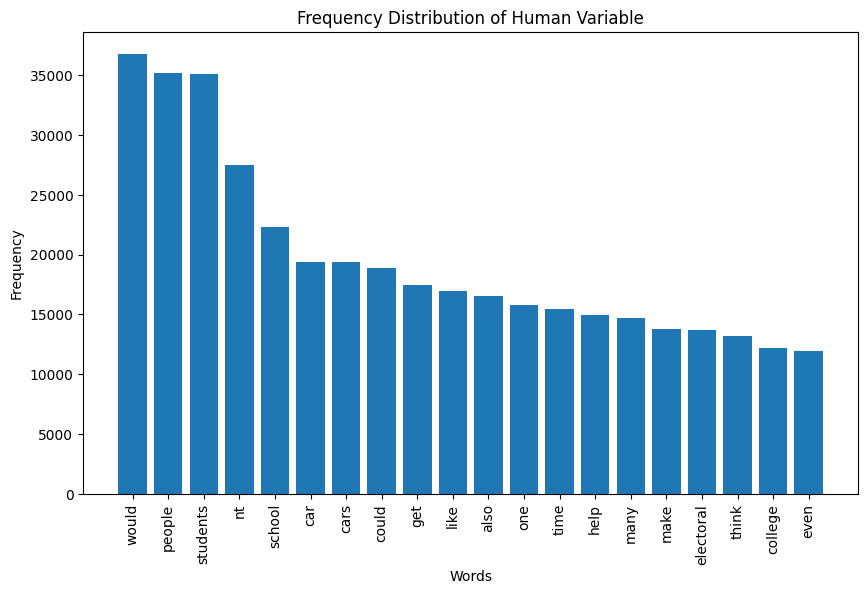

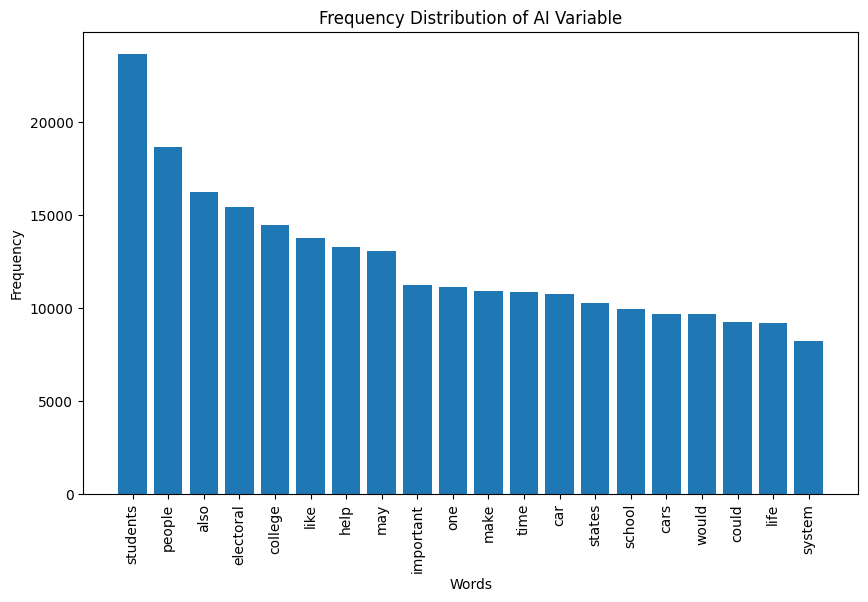

In [41]:


# Plotting the fdist of the human variable

displayWordFreq(fdist_human, 20, True)

displayWordFreq(fdist_ia, 20, False)


In [16]:
#less common words
print("AI")
fdist_ia.most_common()[-20:]


AI


[('greenspan', 1),
 ('dafferent', 1),
 ('malapportaonment', 1),
 ('pach', 1),
 ('directvote', 1),
 ('happenstance', 1),
 ('sober', 1),
 ('ruddy', 1),
 ('cydoniavalles', 1),
 ('planitia', 1),
 ('finegrained', 1),
 ('superstitious', 1),
 ('skylights', 1),
 ('faeetofaee', 1),
 ('yc', 1),
 ('ydditionally', 1),
 ('1896', 1),
 ('turks', 1),
 ('ottoman', 1),
 ('harassing', 1)]

In [17]:
#less common words human
print("Human")
fdist_human.most_common()[-20:]


Human


[('mumble', 1),
 ('stutter', 1),
 ('scarfed', 1),
 ('triumphs', 1),
 ('darts', 1),
 ('undervalued', 1),
 ('nesters', 1),
 ('nuns', 1),
 ('thnsn', 1),
 ('manufactuers', 1),
 ('boar', 1),
 ('reag', 1),
 ('chilg', 1),
 ('shields', 1),
 ('inferring', 1),
 ('fjr', 1),
 ('ragtime', 1),
 ('flux', 1),
 ('unsustainable', 1),
 ('aright', 1)]

## Lexical richness after removing most "meaningless" words

### AI Lexical richness



In [18]:
medium_richness_ia = 0
num = 0

for i in range(0, len(filtered_tok_ia)):
    medium_richness_ia += lexical_richness(filtered_tok_ia[i])
    num += 1
medium_richness_ia = medium_richness_ia/num
medium_richness_ia

0.8776919157099003

### Human Lexical richness

In [19]:
medium_richness_human = 0
num = 0

for i in range(0, len(filtered_tok_human)):
    #print(i, tokens_human[i])
    medium_richness_human = lexical_richness(filtered_tok_human[i])+medium_richness_human
    num += 1


medium_richness_human = medium_richness_human/num
medium_richness_human

0.8996274718977518

In [20]:
# # Assuming you have a dictionary called 'my_dict'
# my_dict = {'a': 5, 'b': 3, 'c': 7, 'd': 7, 'e': 2}

# # Get the key with the most occurrences
# most_common_key = max(my_dict, key=my_dict.get)

# print(most_common_key)  # Output: 'c'

list_commons_ia=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]

f_ia = fdist_ia.most_common()
f_human = fdist_human.most_common()
# print(type(f_ia))
# print(f_ia[0][0])

for i in range(len(f_ia)):
    if len(f_ia[i][0]) < 13:
        list_commons_ia[len(f_ia[i][0])] += 1
    else:
        list_commons_ia[13] += 1   
print(list_commons_ia)     


[0, 181, 652, 2421, 3144, 3431, 3927, 4243, 3928, 3565, 3078, 2343, 1621, 4405]


In [21]:
list_commons_human=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]


f_human = fdist_human.most_common()
# print(type(f_ia))
# print(f_ia[0][0])

for i in range(len(f_human)):
    if len(f_human[i][0]) < 13:
        list_commons_human[len(f_human[i][0])] += 1
    else:
        list_commons_human[13] += 1   
print(list_commons_human) 

[0, 39, 626, 3166, 3830, 4408, 5052, 5100, 4615, 3846, 2972, 2033, 1271, 2130]


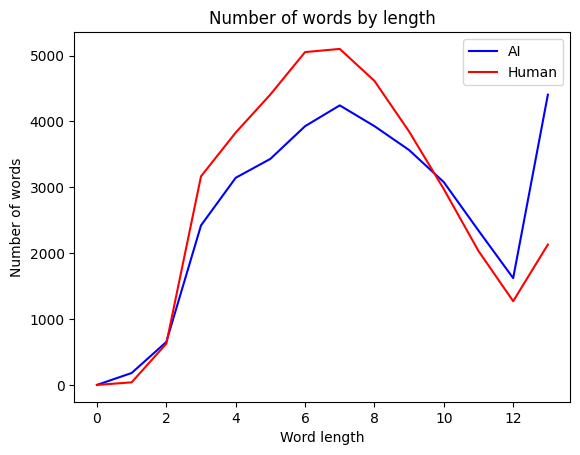

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig= plt.figure()
x=np.arange(14)
y1=list_commons_ia
y2=list_commons_human

plt.errorbar(x, y1, color='b', label='AI')
plt.errorbar(x, y2, color='r', label='Human')

plt.xlabel('Word length')
plt.ylabel('Number of words')

plt.title('Number of words by length')
plt.legend()
plt.show()


## Classifying and Predicting the tokens

#### Importing the necessary libraries

In [23]:
import os
import torch
import numpy as np
from matplotlib import style
import seaborn as sns
from textwrap import wrap
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten




Checking If we can compute the code using the cuda library for GPU computing

In [24]:
#datos = pd.read_csv('archive/AI_Human.csv')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

#### Importing data

In [25]:
import pandas as pd
path_Ruben = '/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/archive/AI_Human.csv'
path_Javier = 'C:/Users/JAVIER/Desktop/Grado de Ingenieria Informatica/Curso 4/Segundo Cuatrimestre/NLP/Dataset/AI_Human.csv'
datos = pd.read_csv(path_Javier)

We divide the DataFrame into 2 different DataFrames: The human dataFrame and the AI dataFrame and we concatenate the dataFrames in order to get an equal number of samples of the 2 type of text

In [26]:
datos_human = datos[datos['generated'] == 0.0]
datos_ia = datos[datos['generated'] == 1.0]

datos_human=datos_human[:10000]
datos_ia=datos_ia[:10000]

In [27]:
datos = pd.concat([datos_human, datos_ia], ignore_index=True)
datos
# datos.to_csv('datos_truncados.csv', index=False)
# datos

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
19995,The use of renewable energy sources is an impo...,1.0
19996,High school sports are often a source of pride...,1.0
19997,The beauty of nature can be seen in the cycle ...,1.0
19998,The impact of air pollution on human health is...,1.0


#### First information extracted from the dataset

- 1: Tokenization
- 2: Stopword and Linking word Removal
- 3: Filtering non-Alphabetic Tokens
- 4: Sentiment Analysis

By calculating this we'll add 2 new columnns into the DS: text length and sentiment score

In [28]:
import nltk

porter = PorterStemmer()
stop_words = set(stopwords.words('english'))
linking_words = {'to', 'the', 'and', 'of', 'in', 'on', 'for', 'with', 'at', 'a', 'an'}

sid = SentimentIntensityAnalyzer()



def analyze_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words and token not in linking_words]
    tokens = [token for token in tokens if token.isalpha()]

    sentiment_scores = sid.polarity_scores(text)
    return len(tokens), sentiment_scores['compound']

datos_human[['text_length', 'sentiment_score']] = datos_human['text'].apply(lambda x: pd.Series(analyze_text(x)))
datos_ia[['text_length', 'sentiment_score']] = datos_ia['text'].apply(lambda x: pd.Series(analyze_text(x)))

We add 2 new columnns: The punctuation count and the linking words count.
- **Punctuation count**: It shows how many punctuation symbols are per text in a row of the set. We know the puntuation symbols because there's a function in the string library. from this knowledge we can extract how long can be the phrases.
- **Linking count**: It shows the number of connectors per text column.


In [29]:
import string
from nltk.tokenize import word_tokenize
def count_punctuation_marks(text):
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    return punctuation_count

def count_linking_words(text):
    linking_words_count = sum(1 for word in word_tokenize(text.lower()) if word in linking_words)
    return linking_words_count

datos_human['punctuation_count'] = datos_human['text'].apply(count_punctuation_marks)
datos_ia['punctuation_count'] = datos_ia['text'].apply(count_punctuation_marks)

datos_human['linking_words_count'] = datos_human['text'].apply(count_linking_words)
datos_ia['linking_words_count'] = datos_ia['text'].apply(count_linking_words)

datos = pd.concat([datos_human, datos_ia], ignore_index=False)
datos


,text,generated,text_length,sentiment_score,punctuation_count,linking_words_count
0,Cars. Cars have been around since they became ...,0.0,329.0,0.9643,75,131
1,Transportation is a large necessity in most co...,0.0,270.0,-0.2426,64,108
2,"""America's love affair with it's vehicles seem...",0.0,437.0,0.9909,101,162
3,How often do you ride in a car? Do you drive a...,0.0,402.0,0.9902,124,133
4,Cars are a wonderful thing. They are perhaps o...,0.0,500.0,-0.9005,110,155
...,...,...,...,...,...,...
26090,The use of renewable energy sources is an impo...,1.0,193.0,0.9910,20,44
26091,High school sports are often a source of pride...,1.0,198.0,0.9969,24,46
26092,The beauty of nature can be seen in the cycle ...,1.0,218.0,0.9961,26,42
26093,The impact of air pollution on human health is...,1.0,235.0,0.7296,26,47


#### Testing if the information extracted is important

We are going to compare the information we have gotten previously (puncutation and linking words count) because we dont know if the information is relevant. In order to do this, we will calculate de mean of the 2 types of data (Human and AI) and we'll compare 1 to 1 the data extracted

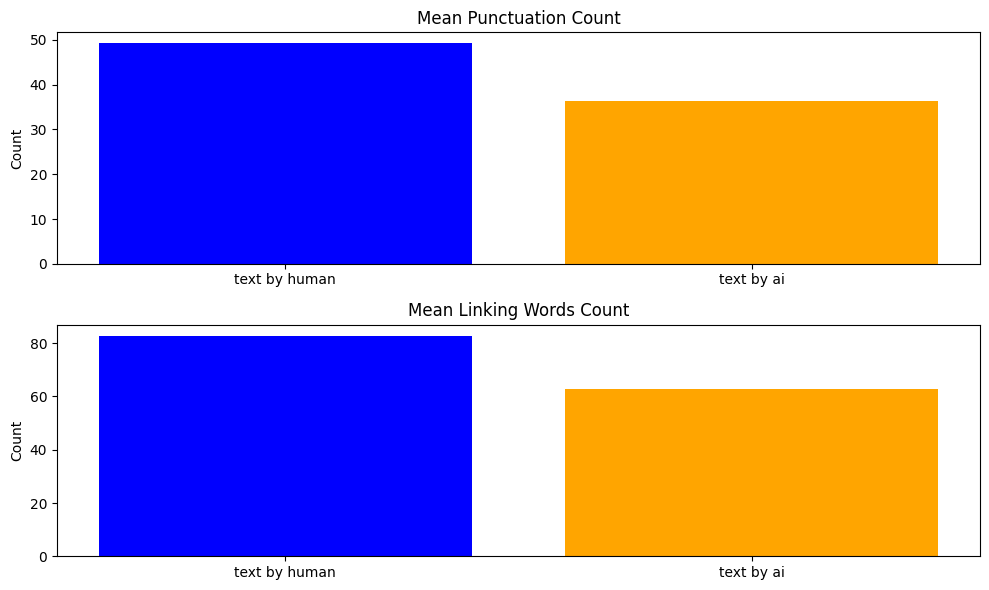

In [30]:
import matplotlib.pyplot as plt

first_mean_punct = datos.iloc[:10000]['punctuation_count'].mean()
first_mean_linking = datos.iloc[:10000]['linking_words_count'].mean()

next_mean_punct = datos.iloc[10000:20000]['punctuation_count'].mean()
next_mean_linking = datos.iloc[10000:20000]['linking_words_count'].mean()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(['text by human', 'text by ai'], [first_mean_punct,next_mean_punct], color=['blue', 'orange'])
plt.title('Mean Punctuation Count')
plt.ylabel('Count')


plt.subplot(2, 1, 2)
plt.bar(['text by human', 'text by ai'], [first_mean_linking, next_mean_linking], color=['blue', 'orange'])
plt.title('Mean Linking Words Count')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


From the information retrieved, we can se that the differences from the sets are aproximatedly a 20%, so the we can conlude that the data retrieved is important. Also, we know that the text length and the setiment score adds up a lot of confussion because in the sentiment analysis we find values in the range of +-1 and the text length is not very important only by itself

In [ ]:

first_mean_length = datos.iloc[:10000]['text_length'].mean()

next_mean_length = datos.iloc[10000:20000]['text_length'].mean()


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(['text by human', 'text by ai'], [first_mean_length,next_mean_length], color=['blue', 'orange'])
plt.title('Mean Text Length')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

: 

In [35]:
copia_datos = datos.copy()

copia_datos.drop(['text_length', 'sentiment_score'], axis = 1, inplace = True)
print(copia_datos.head())

copia_datos.fillna(0, inplace = True)

copia_datos

                                                text  generated  \
0  Cars. Cars have been around since they became ...        0.0   
1  Transportation is a large necessity in most co...        0.0   
2  "America's love affair with it's vehicles seem...        0.0   
3  How often do you ride in a car? Do you drive a...        0.0   
4  Cars are a wonderful thing. They are perhaps o...        0.0   

   punctuation_count  linking_words_count  
0                 75                  131  
1                 64                  108  
2                101                  162  
3                124                  133  
4                110                  155  


,text,generated,punctuation_count,linking_words_count
0,Cars. Cars have been around since they became ...,0.0,75,131
1,Transportation is a large necessity in most co...,0.0,64,108
2,"""America's love affair with it's vehicles seem...",0.0,101,162
3,How often do you ride in a car? Do you drive a...,0.0,124,133
4,Cars are a wonderful thing. They are perhaps o...,0.0,110,155
...,...,...,...,...
26090,The use of renewable energy sources is an impo...,1.0,20,44
26091,High school sports are often a source of pride...,1.0,24,46
26092,The beauty of nature can be seen in the cycle ...,1.0,26,42
26093,The impact of air pollution on human health is...,1.0,26,47


We are going to add 2 new columns into the DS: Text length and word features.
- **Text length**: It is gotten by tokenizing the text in lowercase and returning its length.
-  **Word Features**: We get the word features by tokenizing the text in lowercase and filtering it to not be getting any stopword and not alphabetic words like :). Then we will get the top words by tokenizing all the texts and filtering the most common. The if the words are in the most common we will assign its feature as a 1. 

In [32]:
def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.isalpha() and token not in stop_words]

all_words = [word for text in copia_datos['text'] for word in tokenize_text(text)]
word_count = Counter(all_words)

# print(word_count)

top_words = [word for word, _ in word_count.most_common(500)]

def create_word_features(text):
    tokens = tokenize_text(text)
    return [1 if word in tokens else 0 for word in top_words]

def lengthText(text):
    tokens = word_tokenize(text.lower())
    return len(tokens)

copia_datos['text_length'] = copia_datos['text'].apply(lengthText)

copia_datos['word_features'] = copia_datos['text'].apply(create_word_features)
copia_datos

,text,generated,punctuation_count,linking_words_count,text_length,word_features
0,Cars. Cars have been around since they became ...,0.0,75,131,657,"[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, ..."
1,Transportation is a large necessity in most co...,0.0,64,108,526,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ..."
2,"""America's love affair with it's vehicles seem...",0.0,101,162,842,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, ..."
3,How often do you ride in a car? Do you drive a...,0.0,124,133,805,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ..."
4,Cars are a wonderful thing. They are perhaps o...,0.0,110,155,967,"[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ..."
...,...,...,...,...,...,...
26090,The use of renewable energy sources is an impo...,1.0,20,44,316,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
26091,High school sports are often a source of pride...,1.0,24,46,349,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ..."
26092,The beauty of nature can be seen in the cycle ...,1.0,26,42,355,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ..."
26093,The impact of air pollution on human health is...,1.0,26,47,377,"[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."


We are going to find the relative punctuation and linking word count from the length of the text

In [33]:
def calculate_punctuation_count(text):
    return count_punctuation_marks(text)/ len(word_tokenize(text)) * 100

copia_datos['punctuation_count_percentage'] = copia_datos['text'].apply(calculate_punctuation_count)

def calculate_linking_words_count(text):
    return count_linking_words(text)/ len(word_tokenize(text)) * 100

copia_datos['linking_words_percentage'] = copia_datos['text'].apply(calculate_linking_words_count)

copia_datos

,text,generated,punctuation_count,linking_words_count,text_length,word_features,punctuation_count_percentage,linking_words_percentage
0,Cars. Cars have been around since they became ...,0.0,75,131,657,"[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, ...",11.398176,19.908815
1,Transportation is a large necessity in most co...,0.0,64,108,526,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...",12.167300,20.532319
2,"""America's love affair with it's vehicles seem...",0.0,101,162,842,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, ...",11.995249,19.239905
3,How often do you ride in a car? Do you drive a...,0.0,124,133,805,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...",15.403727,16.521739
4,Cars are a wonderful thing. They are perhaps o...,0.0,110,155,967,"[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ...",11.351909,15.995872
...,...,...,...,...,...,...,...,...
26090,The use of renewable energy sources is an impo...,1.0,20,44,316,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.329114,13.924051
26091,High school sports are often a source of pride...,1.0,24,46,349,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ...",6.876791,13.180516
26092,The beauty of nature can be seen in the cycle ...,1.0,26,42,355,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",7.323944,11.830986
26093,The impact of air pollution on human health is...,1.0,26,47,377,"[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",6.896552,12.466844


### Modeling Logistic Regression with cnn

- 1: Feature Engineering: It creates a DataFrame X containing various features extracted from copia_datos DataFrame. this features include word features, punctuation count percentage, count of synonyms, linking words percentage, and the length of the text. It also assigns the target variable y from the 'generated' column of copia_datos

- 2: Data Splitting: It splits the data into training and testing setns using the train_test_split function from scikit-learn. The testing set size is set to 30%of the total data, and a random state of 42 is user for reproducibility

- 3: Data Imputation: It initializes a SimpleImputer object to handle missing values in the data. The imputer is fitted on the training data (X_train) and then used to transform both the training and testing sets (X_train_imputed and X_test_imputed).

- 4: Model Training: It initializes a logistic regression classifier (LogisticRegression) with specified parameters (max_iter=1000, random_state=42) and trains it on the imputed training data (X_train_imputed, y_train).

- 5: Prediction and Evaluation: Prediction and Evaluation: It makes predictions on the testing set (X_test_imputed) using the trained model and calculates accuracy, logistic loss for both training and testing sets, and generates a classification report containing various metrics such as precision, recall, and F1-score for each class.

- 6: Visualization

Accuracy:  0.9976666666666667
Train loss:  0.003379205134729025
Test loss:  0.007425616429963698
classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3017
         1.0       1.00      1.00      1.00      2983

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

class wise metrics: 
              precision    recall  f1-score      support
0.0            0.998010  0.997348  0.997679  3017.000000
1.0            0.997320  0.997989  0.997654  2983.000000
accuracy       0.997667  0.997667  0.997667     0.997667
macro avg      0.997665  0.997668  0.997667  6000.000000
weighted avg   0.997667  0.997667  0.997667  6000.000000


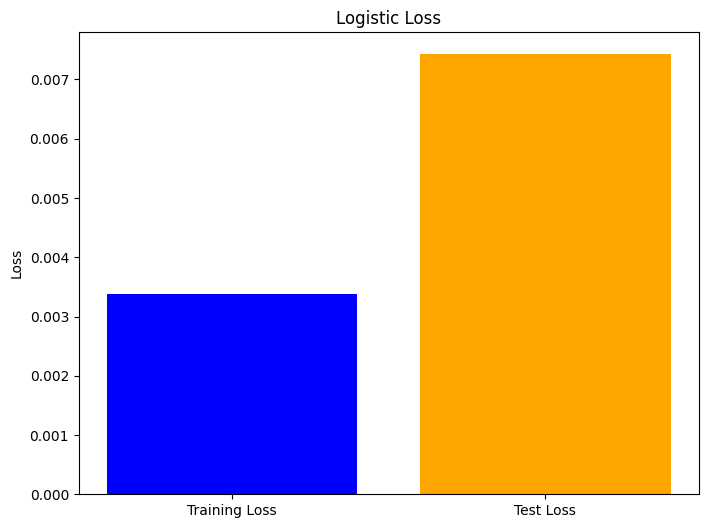

In [34]:
X = pd.DataFrame(copia_datos['word_features'].tolist(), columns=top_words)
X['punctuation_count_percentage'] = copia_datos['punctuation_count_percentage']
X['linking_words_percentage'] = copia_datos['linking_words_percentage']
X['text_length'] = copia_datos['text_length']
y = copia_datos['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer =SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
model = LogisticRegression(max_iter=2000)
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",  accuracy)
train_loss = log_loss(y_train, model.predict_proba(X_train_imputed))

test_loss = log_loss(y_test, model.predict_proba(X_test_imputed))

print("Train loss: ", train_loss)
print("Test loss: ", test_loss)

class_report =classification_report(y_test, y_pred)
print("classification report: ")
print(class_report)

class_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T 
print("class wise metrics: ")
print(class_report_df)

loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Test Loss']

plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['blue', 'orange'])
plt.title('Logistic Loss')
plt.ylabel('Loss')
plt.show()

### Error calculation

Epoch 1/10


c:\Users\JAVIER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9454 - loss: 0.1259 - val_accuracy: 0.9902 - val_loss: 0.0267
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9938 - loss: 0.0208 - val_accuracy: 0.9960 - val_loss: 0.0156
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9971 - loss: 0.0101 - val_accuracy: 0.9960 - val_loss: 0.0130
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9966 - loss: 0.0094 - val_accuracy: 0.9965 - val_loss: 0.0127
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9979 - loss: 0.0069 - val_accuracy: 0.9960 - val_loss: 0.0157
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9982 - loss: 0.0050 - val_accuracy: 0.9977 - val_loss: 0.0116
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9973 - loss: 0.0062 - val_accuracy: 0.9965 - val_loss: 0.0167
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accurac

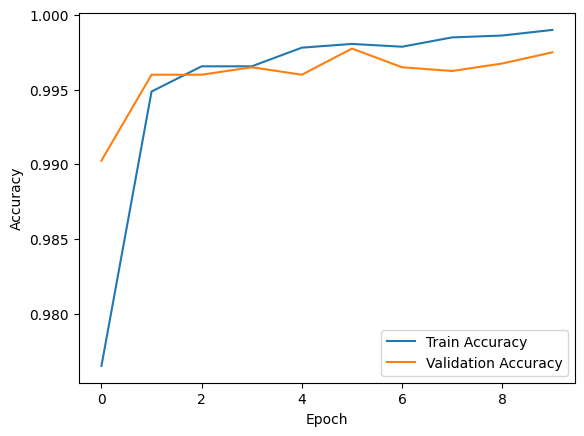

In [35]:
X = pd.DataFrame(copia_datos['word_features'].tolist(), columns=top_words)
X['punctuation_count_percentage'] = copia_datos['punctuation_count_percentage']
X['linking_words_percentage'] = copia_datos['linking_words_percentage']
X['text_length'] = copia_datos['text_length']
y = copia_datos['generated']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

imputer =SimpleImputer(strategy='constant', fill_value=0)

X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)

X_train_cnn = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_valid_cnn = X_valid_imputed.reshape(X_valid_imputed.shape[0], X_valid_imputed.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_valid_cnn, y_valid))

y_train_pred_probs = model.predict(X_train_cnn)
y_valid_pred_probs = model.predict(X_valid_cnn)

y_train_pred = (y_train_pred_probs > 0.5).astype(int)
y_valid_pred = (y_valid_pred_probs > 0.5).astype(int)

train_error = 1 - accuracy_score(y_train, y_train_pred)

validation_error = 1 - accuracy_score(y_valid, y_valid_pred)

print("Train error: ", train_error)
print("Validation error: ", validation_error)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

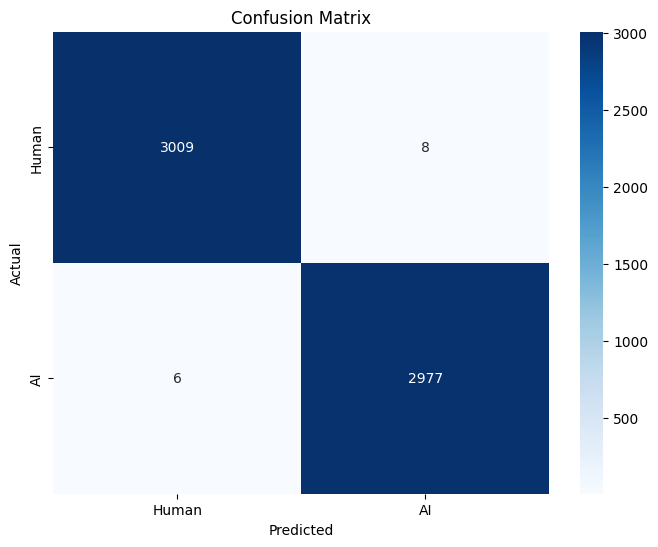

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()